In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from tensorflow.python.framework import ops

In [127]:
# If large number of features with few examples, logistic regression or linear SVM
# Lots of training examples or not linearly separable, SVM with Gaussian kernel
# Implement a soft separable SVM implementing specific loss function
ops.reset_default_graph()
sess = tf.Session()

In [128]:
# Start graph session, load data (1st and 4th variables)
# Target takes on 1, otherwise -1
iris = datasets.load_iris()
x_vals = np.array([[x[0], x[3]] for x in iris.data])
y_vals = np.array([1 if y==0 else -1 for y in iris.target])   

In [129]:
# Split into train and test, evaluating accuracy on both
# We know it is linearly separable, should get 100% accuracy on both
train_indicies = np.random.choice(len(x_vals), round(len(x_vals)*0.8),replace=False)
test_indicies = np.array(list(set(range(len(x_vals))) - set(train_indicies)))
x_vals_train = x_vals[train_indicies]
x_vals_test = x_vals[test_indicies]
y_vals_train = y_vals[train_indicies]
y_vals_test = y_vals[test_indicies]

In [130]:
# Set batch size, placeholders, and model variables
# With SVM, want large batch sizes to help with convergence
# Ideally, slowly decrease learning rate
# A takes shape (2,1) because we have two predictor variables
batch_size = 100
x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[2,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# Model output, for correctly classified points, returns >=1 if Setosa
# Otherwise, returns <= -1
model_output = tf.subtract(tf.matmul(x_data,A),b)

In [131]:
# Put together components for maximum margin loss
# Calculate L2 norm, add margin parameter
# Declare classification loss, add together two terms
l2_norm = tf.reduce_sum(tf.square(A))
alpha = tf.constant([0.1])
classification_term = tf.reduce_mean(tf.maximum(0.,tf.subtract(1.,tf.multiply(model_output,y_target))))
loss = tf.add(classification_term, tf.multiply(alpha,l2_norm))

In [132]:
# Declare prediction and accuracy functions so we can evaluate
prediction = tf.sign(model_output)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction,y_target),tf.float32))

In [133]:
# Declare optimizer, initialize model variables
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)

In [134]:
# Start training loop, recording loss and training accuracy on training and test sets
loss_vec = []
train_accuracy = []
test_accuracy = []
for i in range(500):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target:rand_y})

    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)

    train_acc_temp = sess.run(accuracy, feed_dict={x_data: x_vals_train, y_target: np.transpose([y_vals_train])})
    train_accuracy.append(train_acc_temp)
    
    test_acc_temp = sess.run(accuracy, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_accuracy.append(test_acc_temp)

    if (i+1)%100==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + 'b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #100 A = [[ 0.14809349]
 [-1.4688874 ]]b = [[-0.27962512]]
Loss = [0.43059188]
Step #200 A = [[ 0.13780317]
 [-1.4512043 ]]b = [[-0.3346252]]
Loss = [0.4138367]


Step #300 A = [[ 0.12987433]
 [-1.4392307 ]]b = [[-0.38882515]]
Loss = [0.4159346]


Step #400 A = [[ 0.11605632]
 [-1.4327652 ]]b = [[-0.44222513]]
Loss = [0.4143238]
Step #500 A = [[ 0.10731567]
 [-1.4248695 ]]b = [[-0.4953252]]
Loss = [0.3709446]


In [135]:
[[a1], [a2]] = sess.run(A)
[[b]] = sess.run(b)
slope = -a2/a1
y_intercept = b/a1
x1_vals = [d[1] for d in x_vals]
best_fit = []
for i in x1_vals:
    best_fit.append(slope*i+y_intercept)
    setosa_x = [d[1] for i,d in enumerate(x_vals) if y_vals[i]==1]
    setosa_y = [d[0] for i,d in enumerate(x_vals) if y_vals[i]==1]
    not_setosa_x = [d[1] for i,d in enumerate(x_vals) if y_vals[i]==-1]
    not_setosa_y = [d[0] for i,d in enumerate(x_vals) if y_vals[i]==-1]

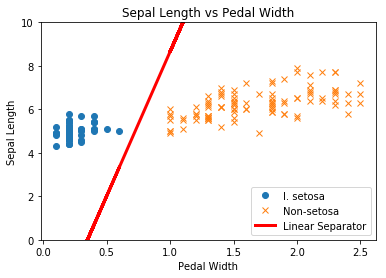

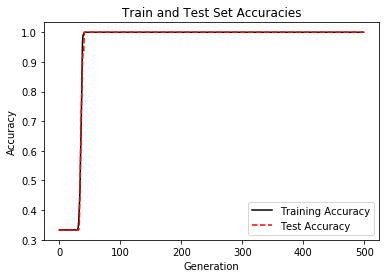

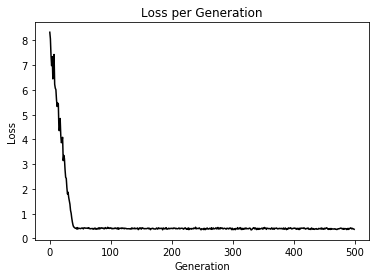

In [136]:
plt.plot(setosa_x, setosa_y, 'o', label='I. setosa')
plt.plot(not_setosa_x, not_setosa_y, 'x', label='Non-setosa')
plt.plot(x1_vals, best_fit, 'r-', label='Linear Separator',linewidth=3)
plt.ylim([0, 10])
plt.legend(loc='lower right')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

plt.plot(train_accuracy, 'k-',label='Training Accuracy')
plt.plot(test_accuracy, 'r--', label='Test Accuracy')
plt.title('Train and Test Set Accuracies')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()

In [37]:
# Reduction to Linear Regression, start graph, load data, split datasets
# Declare batch size, placeholders, variables, create linear model
ops.reset_default_graph()
sess = tf.Session()
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])  
train_indicies = np.random.choice(len(x_vals), round(len(x_vals)*0.8),replace=False)
test_indicies = np.array(list(set(range(len(x_vals))) - set(train_indicies)))
x_vals_train = x_vals[train_indicies]
x_vals_test = x_vals[test_indicies]
y_vals_train = y_vals[train_indicies]
y_vals_test = y_vals[test_indicies]

batch_size = 50
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

model_output = tf.add(tf.matmul(x_data,A),b)

In [38]:
# Declare loss function, implemented to follow epsilon = 0.5, part of our 
# loss function which allows for a soft margin instead of a hard margin
epsilon = tf.constant([0.5])
loss = tf.reduce_mean(tf.maximum(0., tf.subtract(tf.abs(tf.subtract(model_output,y_target)),epsilon)))

my_opt = tf.train.GradientDescentOptimizer(0.075)
train_step = my_opt.minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)

In [39]:
# Iterate through 200 training iterations, save train and test loss for future plotting
train_loss = []
test_loss = []
for i in range(200):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = np.transpose([x_vals_train[rand_index]])
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target:rand_y})

    temp_train_loss = sess.run(loss, feed_dict={x_data:np.transpose([x_vals_train]), y_target: np.transpose([y_vals_train])})
    train_loss.append(temp_train_loss)
    temp_test_loss = sess.run(loss, feed_dict={x_data:np.transpose([x_vals_test]), y_target: np.transpose([y_vals_test])})
    test_loss.append(temp_test_loss)
    if (i+1) % 50 == 0:
        print('-----------')
        print('Generation: ' + str(i))
        print('A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Train Loss = ' + str(temp_train_loss))
        print('Test Loss = ' + str(temp_test_loss))

-----------
Generation: 49
A = [[1.5816556]] b = [[3.6936414]]
Train Loss = 0.24702325
Test Loss = 0.21396773
-----------
Generation: 99
A = [[1.1978061]] b = [[4.2861414]]
Train Loss = 0.10810402
Test Loss = 0.101356715
-----------
Generation: 149
A = [[1.0166061]] b = [[4.5261416]]
Train Loss = 0.08427704
Test Loss = 0.098505005
-----------
Generation: 199
A = [[0.9347063]] b = [[4.6791425]]
Train Loss = 0.07607355
Test Loss = 0.094124906


In [40]:
# Extract coefficients, get values for best fit line and margins used
[[slope]] = sess.run(A)
[[y_intercept]] = sess.run(b)
[width] = sess.run(epsilon)
best_fit = []
best_fit_upper = []
best_fit_lower = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)
    best_fit_upper.append(slope*i+y_intercept+width)
    best_fit_lower.append(slope*i+y_intercept-width)

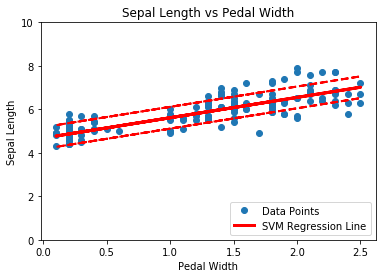

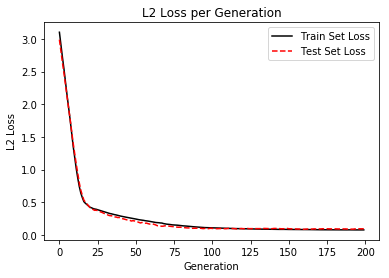

In [41]:
# Plot data with fitted line and train-test loss
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='SVM Regression Line',linewidth=3)
plt.plot(x_vals, best_fit_upper, 'r--', linewidth=2)
plt.plot(x_vals, best_fit_lower, 'r--', linewidth=2)
plt.ylim([0, 10])
plt.legend(loc='lower right')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()
plt.plot(train_loss, 'k-', label='Train Set Loss')
plt.plot(test_loss, 'r--', label='Test Set Loss')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.legend(loc='upper right')
plt.show()

In [44]:
# Implement a non-linear kernel to split a dataset 
# Reduction to Linear Regression, start graph, load data, split datasets
# Declare batch size, placeholders, variables, create linear model
ops.reset_default_graph()
sess = tf.Session()
iris = datasets.load_iris()
x_vals = np.array([[x[0],x[3]] for x in iris.data])
y_vals = np.array([1 if y == 0 else -1 for y in iris.target])
class1_x = [x[0] for i,x in enumerate(x_vals) if y_vals[i] == 1]
class1_y = [x[1] for i,x in enumerate(x_vals) if y_vals[i] == 1]
class2_x = [x[0] for i,x in enumerate(x_vals) if y_vals[i] == -1]
class2_y = [x[1] for i,x in enumerate(x_vals) if y_vals[i] == -1]

batch_size = 100
x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
prediction_grid = tf.placeholder(shape=[None, 2], dtype=tf.float32)
b = tf.Variable(tf.random_normal(shape=[1, batch_size]))

In [65]:
# Declare Gaussian kernel, dependent on the gamma value
# Illustrate the effects of various gamma values later in the recipe
gamma = tf.constant(-1.0)
dist = tf.reduce_sum(tf.square(x_data),1)
dist = tf.reshape(dist,[-1,1])
sq_dists = tf.add(tf.subtract(dist,tf.multiply(2.,tf.matmul(x_data,tf.transpose(x_data)))),tf.transpose(dist))
my_kernel = tf.exp(tf.multiply(gamma,tf.abs(sq_dists)))

# Compute the loss for the dual optimization problem
model_output = tf.matmul(b,my_kernel)
first_term = tf.reduce_sum(b)
b_vec_cross = tf.matmul(tf.transpose(b),b)
y_target_cross = tf.matmul(y_target, tf.transpose(y_target))
second_term = tf.reduce_sum(tf.multiply(my_kernel,tf.multiply(b_vec_cross,y_target_cross)))
loss = tf.negative(tf.subtract(first_term,second_term))

In [66]:
rA = tf.reshape(tf.reduce_sum(tf.square(x_data),1),[-1,1])
rB = tf.reshape(tf.reduce_sum(tf.square(prediction_grid),1),[-1,1])
pred_sq_dist = tf.add(tf.subtract(rA,tf.multiply(2.,tf.matmul(x_data,tf.transpose(prediction_grid)))), tf.transpose(rB))
prediction_kernel = tf.exp(tf.multiply(gamma,tf.abs(pred_sq_dist)))

prediction_output = tf.matmul(tf.multiply(tf.transpose(y_target),b),prediction_kernel)
prediction = tf.sign(prediction_output - tf.reduce_mean(prediction_output))
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.squeeze(prediction),tf.squeeze(y_target)), tf.float32))

In [67]:
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)

In [68]:
loss_vec = []
batch_accuracy = []
for i in range(300):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_index]
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target:rand_y})

    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)

    acc_temp = sess.run(accuracy, feed_dict={x_data: rand_x, y_target: rand_y, prediction_grid:rand_x})
    batch_accuracy.append(acc_temp)

In [69]:
x_min, x_max = x_vals[:, 0].min() - 1, x_vals[:, 0].max() + 1
y_min, y_max = x_vals[:, 1].min() - 1, x_vals[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
np.arange(y_min, y_max, 0.02))
grid_points = np.c_[xx.ravel(), yy.ravel()]
[grid_predictions] = sess.run(prediction, feed_dict={x_data:rand_x,y_target:rand_y,prediction_grid: grid_points})
grid_predictions = grid_predictions.reshape(xx.shape)

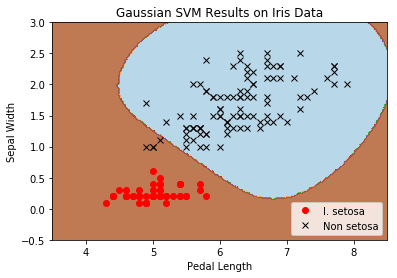

In [70]:
plt.contourf(xx, yy, grid_predictions, cmap=plt.cm.Paired,alpha=0.8)
plt.plot(class1_x, class1_y, 'ro', label='I. setosa')
plt.plot(class2_x, class2_y, 'kx', label='Non setosa')
plt.title('Gaussian SVM Results on Iris Data')
plt.xlabel('Pedal Length')
plt.ylabel('Sepal Width')
plt.legend(loc='lower right')
plt.ylim([-0.5, 3.0])
plt.xlim([3.5, 8.5])
plt.show()

In [82]:
# To get multi class, use one versus all or one versus one strategies
# 1v1 is where binary classifier created for each possible pair of classes, computationally expensive
# 1vAll creates classifier for each class, implemented here
# Reduction to Linear Regression, start graph, load data, split datasets
# Declare batch size, placeholders, variables, create linear model
ops.reset_default_graph()
sess = tf.Session()
iris = datasets.load_iris()
x_vals = np.array([[x[0],x[3]] for x in iris.data])

y_vals1 = np.array([1 if y == 0 else -1 for y in iris.target])
y_vals2 = np.array([1 if y == 1 else -1 for y in iris.target])
y_vals3 = np.array([1 if y == 2 else -1 for y in iris.target])
y_vals = np.array([y_vals1,y_vals2,y_vals3])

class1_x = [x[0] for i,x in enumerate(x_vals) if iris.target[i] == 0]
class1_y = [x[1] for i,x in enumerate(x_vals) if iris.target[i] == 0]
class2_x = [x[0] for i,x in enumerate(x_vals) if iris.target[i] == 1]
class2_y = [x[1] for i,x in enumerate(x_vals) if iris.target[i] == 1]
class3_x = [x[0] for i,x in enumerate(x_vals) if iris.target[i] == 2]
class3_y = [x[1] for i,x in enumerate(x_vals) if iris.target[i] == 2]

batch_size = 50
x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[3,None], dtype=tf.float32)

prediction_grid = tf.placeholder(shape=[None, 2], dtype=tf.float32)
b = tf.Variable(tf.random_normal(shape=[3, batch_size]))

In [83]:
# Declare Gaussian kernel, dependent on the gamma value
# Only dependent on the x data, so identical to the previous script
gamma = tf.constant(-10.0)
dist = tf.reduce_sum(tf.square(x_data),1)
dist = tf.reshape(dist,[-1,1])
sq_dists = tf.add(tf.subtract(dist,tf.multiply(2.,tf.matmul(x_data,tf.transpose(x_data)))),tf.transpose(dist))
my_kernel = tf.exp(tf.multiply(gamma,tf.abs(sq_dists)))

In [84]:
# Batch matrix multiplication, end up with 3d matrices, want to broadcast matmul across 3rd index
# In order for tf.matmul(tf.transpose(x),x) to work across extra dimension, create function to expand matrices,
# Reshape matrix into a transpose, and call tf.matmul across extra dimension
def reshape_matmul(mat):
    v1 = tf.expand_dims(mat,1)
    v2 = tf.reshape(v1, [3,batch_size,1])
    return(tf.matmul(v2,v1))

In [85]:
# Compute the loss for the dual optimization problem
model_output = tf.matmul(b,my_kernel)
first_term = tf.reduce_sum(b)
b_vec_cross = tf.matmul(tf.transpose(b),b)
y_target_cross = reshape_matmul(y_target)
second_term = tf.reduce_sum(tf.multiply(my_kernel,tf.multiply(b_vec_cross,y_target_cross)),[1,2])
loss = tf.reduce_sum(tf.negative(tf.subtract(first_term,second_term)))

In [86]:
# Be careful not to reduce across all three SVM predictions
# Tell tf not to sum everything up with a second index argument
rA = tf.reshape(tf.reduce_sum(tf.square(x_data),1),[-1,1])
rB = tf.reshape(tf.reduce_sum(tf.square(prediction_grid),1),[-1,1])
pred_sq_dist = tf.add(tf.subtract(rA,tf.multiply(2.,tf.matmul(x_data,tf.transpose(prediction_grid)))), tf.transpose(rB))
prediction_kernel = tf.exp(tf.multiply(gamma,tf.abs(pred_sq_dist)))

# Create predictions, no longer the sign() output, but a classifier that has the largest output
# Use arg_max()
prediction_output = tf.matmul(tf.multiply(y_target,b),prediction_kernel)
prediction = tf.arg_max(prediction_output - tf.expand_dims(tf.reduce_mean(prediction_output,1),1),0)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction,tf.arg_max(y_target,0)), tf.float32))

In [87]:
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)

In [88]:
loss_vec = []
batch_accuracy = []
for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_index]
    rand_y = y_vals[:,rand_index]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target:rand_y})

    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)

    acc_temp = sess.run(accuracy, feed_dict={x_data: rand_x, y_target: rand_y, prediction_grid:rand_x})
    batch_accuracy.append(acc_temp)
    
    if (i+1)%25==0:
        print('Step #' + str(i+1))
        print('Loss = ' + str(temp_loss))

Step #25
Loss = -6.8435793
Step #50
Loss = -27.859163
Step #75
Loss = -29.699533
Step #100
Loss = -28.790474


In [90]:
x_min, x_max = x_vals[:, 0].min() - 1, x_vals[:, 0].max() + 1
y_min, y_max = x_vals[:, 1].min() - 1, x_vals[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_predictions = sess.run(prediction, feed_dict={x_data  :rand_x,
                                                     y_target : rand_y,
                                                     prediction_grid : grid_points})
grid_predictions = grid_predictions.reshape(xx.shape)

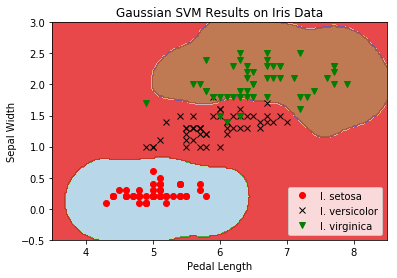

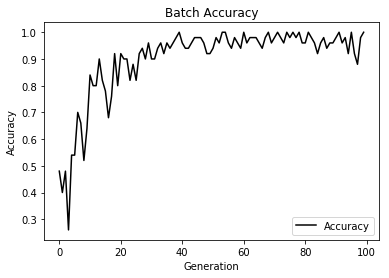

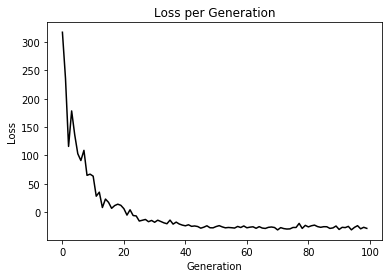

In [91]:
plt.contourf(xx, yy, grid_predictions, cmap=plt.cm.Paired,alpha=0.8)
plt.plot(class1_x, class1_y, 'ro', label='I. setosa')
plt.plot(class2_x, class2_y, 'kx', label='I. versicolor')
plt.plot(class3_x, class3_y, 'gv', label='I. virginica')
plt.title('Gaussian SVM Results on Iris Data')
plt.xlabel('Pedal Length')
plt.ylabel('Sepal Width')
plt.legend(loc='lower right')
plt.ylim([-0.5, 3.0])
plt.xlim([3.5, 8.5])
plt.show()
plt.plot(batch_accuracy, 'k-', label='Accuracy')

plt.title('Batch Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()